In [1]:
training_data_name = "fd=0.3-0.7_hdf5"
testing_data = "nair_abraham_2010_hdf5"

In [2]:
#training_data_name = "califa"
#testing_data = "fd=0.3-0.7"

In [3]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)#

    except RuntimeError as e:
        print(e)
        


In [4]:
print(gpus)
print("Kernel Loaded!")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Kernel Loaded!


In [5]:
#import tensorflow as tf
#from keras.backend.tensorflow_backend import set_session

#config = tf.ConfigProto()
#config.gpu_options.allow_growth = True
#sess = tf.Session(config=config)
#set_session(sess)

In [6]:
"""

This is for morphological classification of galaxies by CNN,
By Kenji Bekki, on 2020/2/14 for Nair & Abraham 2010

"""


import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from keras.models import model_from_json
import keras.callbacks
import numpy as np
#import keras.backend.tensorflow_backend as KTF
#import tensorflow as tf
import os.path


### Total model number = (nmodle0) * nmodel

#iset=int(input('Input the total number of sets of models '))
#nmodel0=int(input('Input the total number of images per model'))
#nmodel=nmodel0*iset
nmodel=2000
print('nmodel',nmodel)

### Original values
#batch_size = 128
#num_classes = 10
#epochs = 12
batch_size = 128
#num_classes = 5
num_classes = 2
epochs = 300
nb_epoch=epochs
n_mesh=50
#nmodel=1000
print('nmodel',nmodel)
print('num_classes',num_classes)

img_rows, img_cols = n_mesh, n_mesh
n_mesh2=n_mesh*n_mesh-1
n_mesh3=n_mesh*n_mesh


print(img_rows, img_cols, n_mesh2)

input_shape = (img_rows, img_cols, 1)
print(input_shape)

nmodel 2000
nmodel 2000
num_classes 2
50 50 2499
(50, 50, 1)


In [7]:
import sys
sys.path.insert(0, "..\\utility")
from data_loading import *
x_dataset, y_dataset, metadata = load_hdf5_data(name=training_data_name, count=None)
nmodel = y_dataset.shape[0]
input_shape = x_dataset[0].shape
print(np.unique(y_dataset, return_counts = True))
print(x_dataset.dtype)
print(np.max(x_dataset))
print(x_dataset.shape)

E:\Anaconda3\envs\honours\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(54000, 100, 100)
(array([0, 1], dtype=object), array([27000, 27000], dtype=int64))
float64
1.0
(54000, 100, 100)


In [8]:
from data_preprocessing import *
print("Adding point sources")
add_point_sources(x_dataset)
print("Adding new point sources")
add_point_sources_new(x_dataset)
#print("Adding gaussian blur")
#apply_gaussian_PSF(x_dataset, 0.2)
print("Adding gaussian noise")
add_gaussian_noise(x_dataset)

print(x_dataset.shape)
y_dataset = y_dataset.reshape([-1, 1])
print(y_dataset.shape)

unique, counts = np.unique(y_dataset, return_counts=True)
print(np.asarray((unique, counts)).T)

print(y_dataset[0])
print(np.max(x_dataset))

Adding point sources
Adding new point sources
Adding gaussian noise
(54000, 100, 100)
(54000, 1)
[[0 27000]
 [1 27000]]
[0]
1.004297362474869


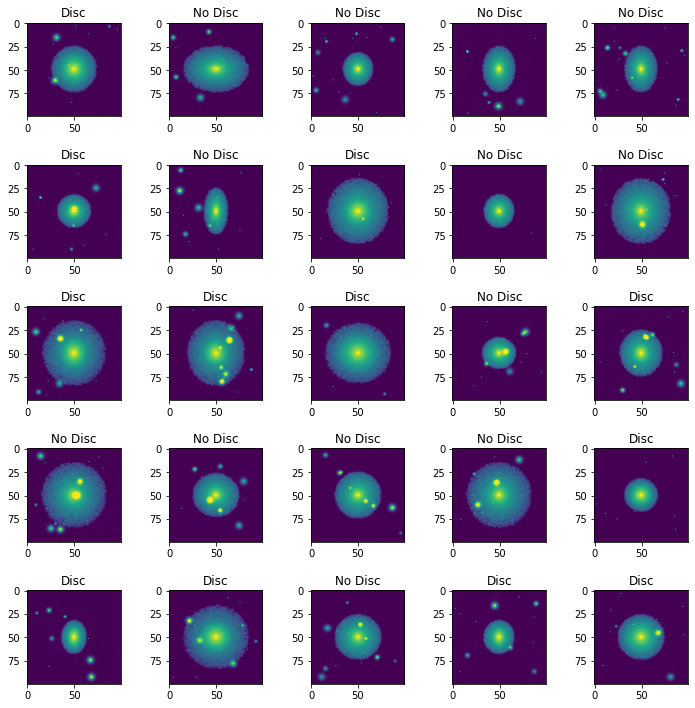

In [9]:
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.figsize'] = [10, 10]
mpl.rcParams['figure.dpi'] = 72
from plotting_helpers import *
plot_classification_results(images=x_dataset, y_preds=y_dataset, y_trues=y_dataset, y_labels=("No Disc", "Disc"), random_sample=True)

In [10]:
from matplotlib import pyplot as plt

In [11]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_dataset, y_dataset, train_size=0.9, random_state=1)

In [12]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [13]:
x_val, Y_val, metadata = load_hdf5_data(name=testing_data)
class_labels = np.unique(metadata["class"])[::-1]
#recid = -1
#print(metadata[recid])
#print(class_labels[Y_val[recid]])
#print(Y_val[recid])

E:\Anaconda3\envs\honours\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'NYU-DR4_Object_Tag'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
E:\Anaconda3\envs\honours\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is a Python keyword: 'class'; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
E:\Anaconda3\envs\honours\lib\site-packages\tables\path.py:155: NaturalNameWarning: object name is not a valid Python identifier: 'g-r'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


(2723, 100, 100)


In [14]:
#%run ../utility/data_pre-processing.ipynb
#add_gaussian_noise(x_val)
#add_point_sources(x_val)
#add_point_sources_new(x_val)

In [15]:
#plot_classification_results(images=x_val, y_preds=Y_val, y_trues=Y_val,
 #                           y_labels=(class_labels[1], class_labels[0]),
  #                          galaxy_names=metadata["name"], random_sample=True)

In [16]:
Y_val = keras.utils.np_utils.to_categorical(Y_val, num_classes)

In [17]:
print(type(x_val))

<class 'numpy.ndarray'>


In [18]:
print(x_train.shape)
print(y_train.shape)

(48600, 100, 100)
(48600, 2)


In [19]:
print(x_val.shape)
print(Y_val.shape)

(2723, 100, 100)
(1, 2723, 2)


In [20]:
print(x_test.shape)
print(y_test.shape)
batch_size = 128
epochs = 30

(5400, 100, 100)
(5400, 2)


In [21]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))
x_val = x_val.reshape((x_val.shape[0], x_val.shape[1],x_val.shape[2], 1 ))
input_shape = x_train[0].shape

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(loss=tf.keras.losses.categorical_crossentropy,
                  optimizer=tf.keras.optimizers.Adadelta(learning_rate=1.0),
                  metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          verbose=1, validation_data=(x_test, y_test), callbacks=[callback])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


print('save the architecture of a model')

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Epoch 1/30
380/380 [==============================] - 43s 83ms/step - loss: 0.7141 - accuracy: 0.5089 - val_loss: 0.6892 - val_accuracy: 0.5535
Epoch 2/30
380/380 [==============================] - 27s 72ms/step - loss: 0.6805 - accuracy: 0.5689 - val_loss: 0.6180 - val_accuracy: 0.5922
Epoch 3/30
380/380 [==============================] - 26s 68ms/step - loss: 0.5669 - accuracy: 0.7232 - val_loss: 0.3595 - val_accuracy: 0.8924
Epoch 4/30
380/380 [==============================] - 26s 69ms/step - loss: 0.3079 - accuracy: 0.8913 - val_loss: 0.0932 - val_accuracy: 0.9650
Epoch 5/30
380/380 [==============================] - 26s 70ms/step - loss: 0.1155 - accuracy: 0.9620 - val_loss: 0.0352 - val_accuracy: 0.9874
Epoch 6/30
380/380 [==============================] - 26s 69ms/step - loss: 0.0530 - accuracy: 0.9823 - val_loss: 0.0199 - val_accuracy: 0.9919
Epoch 7/30
380/380 [==============================] - 26s 68ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.0091 - val_accuracy:

INFO:tensorflow:Assets written to: save_models\simulation_wo_psf\assets


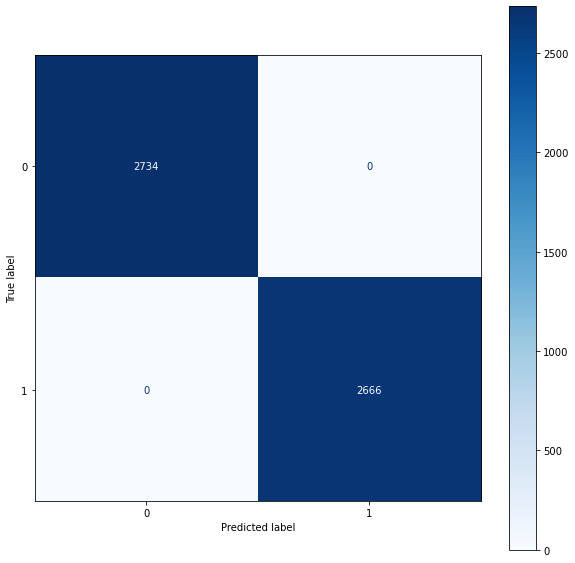

In [23]:
model.save(r"save_models\simulation_wo_psf", overwrite=True)
from sklearn import metrics

true_data = y_test
predicted_data = model.predict(x_test)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1))).plot(cmap='Blues')

In [24]:
from sklearn import metrics
class_labels = np.unique(metadata["class"])
print(class_labels)
#recid = -1
#print(metadata[recid])

#print(class_labels[Y_val[recid]])
#print(Y_val[recid])
#print(predicted_data)
true_data = Y_val
predicted_data = model.predict(x_val)
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1)),
                               display_labels=class_labels).plot(cmap='Blues')

[-1]


ValueError: Found input variables with inconsistent numbers of samples: [1, 2723]

In [ ]:
#mpl.rcParams['figure.figsize'] = [16, 40]
#mpl.rcParams['figure.dpi'] = 72
plot_classification_results(images=x_val, display_size=(12, 5), y_preds=predicted_data.argmax(axis=1), y_trues=Y_val.argmax(axis=1),
                            y_labels=class_labels,
                            galaxy_names=metadata["name"], random_sample=True)

In [ ]:
no_arg = model.predict(x_dataset[:1])
no_arg.argmax(axis=1)

In [ ]:
predict = model.predict(x_val).argmax(axis=1)
np.unique(predict, return_counts=True)

In [ ]:
model.save(r"save_models\simulation_psf_0.3", overwrite=True)

In [ ]:
metrics.confusion_matrix(true_data.argmax(axis=1), predicted_data.argmax(axis=1))